In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from scipy import interp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

0.983333333333


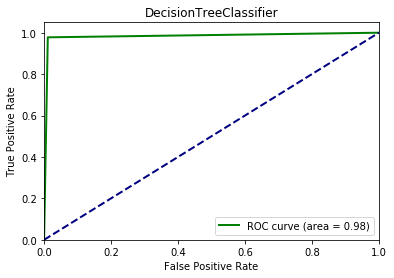

0.983333333333


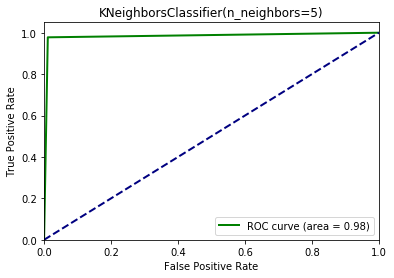

ValueError: bad input shape (105, 3)

In [69]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB()
]

classifiers_names = [
    'DecisionTreeClassifier',
    'KNeighborsClassifier(n_neighbors=5)',
    GaussianNB()
]

#classifier = DecisionTreeClassifier()

for idx, classifier in enumerate(classifiers):
    y_score = classifier.fit(X_train, y_train).predict(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    #ROC curve for a specific class here for the class 2
    print roc_auc["micro"]
    plt.figure()
    lw = 2
    
    plt.plot(fpr["micro"], tpr["micro"], color='green',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(classifiers_names[idx])
    plt.legend(loc="lower right")
    plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

Naive_clf = GaussianNB()
Naive_clf.fit(X_train, y_train)
y_score = Naive_clf.predict(X_test)

#y_score = classifier.fit(X_train, y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#ROC curve for a specific class here for the class 2
roc_auc["micro"]

IndexError: too many indices for array

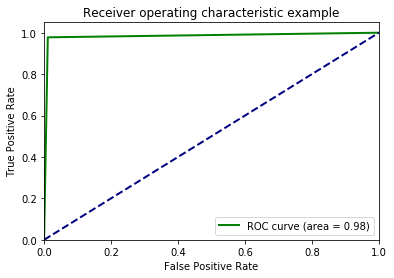

In [44]:
plt.figure()
lw = 2

plt.plot(fpr["micro"], tpr["micro"], color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [73]:
y_train.shape

(105, 3)

In [75]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)